In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from prophet import Prophet
from tabulate import tabulate

In [2]:
df = pd.read_excel('../data/cdc_suicide.xlsx')
df = df[['State', 'Year','Ten-Year Age Groups', 'Gender', 'Crude Rate', 'Population','Deaths']]

In [3]:
df = df[df['Crude Rate'] != 'Unreliable']
df['Crude Rate'].astype(int)
df = df[df['Year'] >= 2010]
df.head()

,State,Year,Ten-Year Age Groups,Gender,Crude Rate,Population,Deaths
17,Alabama,2010,15-24 years,Male,19,342671,65
18,Alabama,2011,15-24 years,Male,21.2,343899,73
20,Alabama,2012,15-24 years,Male,16.7,341668,57
22,Alabama,2013,15-24 years,Male,19.6,342198,67
24,Alabama,2014,15-24 years,Male,15.1,338835,51


In [38]:
df_state = df[['State', 'Year', 'Crude Rate']].groupby('State').mean()

In [40]:
df_state

,Year
State,
Alabama,2015.280992
Alaska,2015.179487
Arizona,2015.098684
Arkansas,2015.138614
California,2015.016760
Colorado,2015.126761
Connecticut,2015.320988
Delaware,2015.090909
Florida,2015.017751


In [30]:
print(df[['Crude Rate', 'Deaths', 'Population']].describe().iloc[1:].to_latex())

\begin{tabular}{lrr}
\toprule
{} &      Deaths &    Population \\
\midrule
mean &   84.856710 &  4.776955e+05 \\
std  &   85.376851 &  4.888342e+05 \\
min  &   20.000000 &  1.453800e+04 \\
25\%  &   32.000000 &  1.812008e+05 \\
50\%  &   55.500000 &  3.475770e+05 \\
75\%  &  104.000000 &  5.856102e+05 \\
max  &  663.000000 &  3.126252e+06 \\
\bottomrule
\end{tabular}



/var/folders/92/d911pm8n4r97vjmjk_vvvwfh0000gn/T/ipykernel_44560/386230085.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df[['Crude Rate', 'Deaths', 'Population']].describe().iloc[1:].to_latex())


# Figures

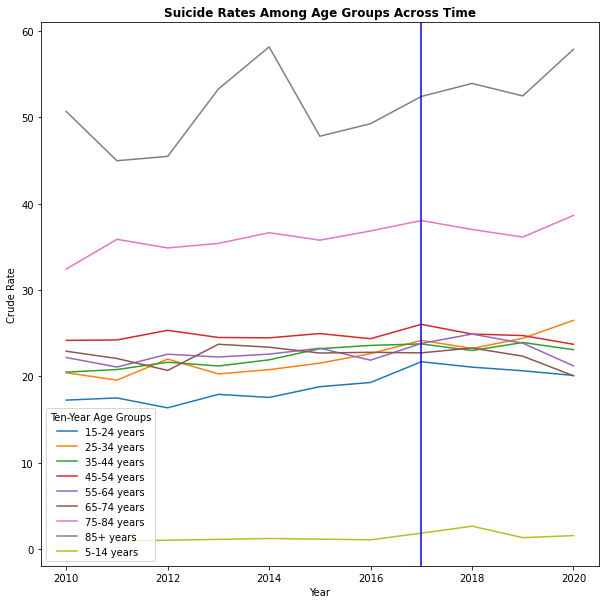

In [4]:
plt.figure(figsize = (10,10))
plt.title('Suicide Rates Among Age Groups Across Time', fontweight = 'bold')
sns.lineplot(x = 'Year', y = 'Crude Rate',data = df, hue = 'Ten-Year Age Groups',ci=None)
plt.axvline(2017, color='b', label='axvline - full height')

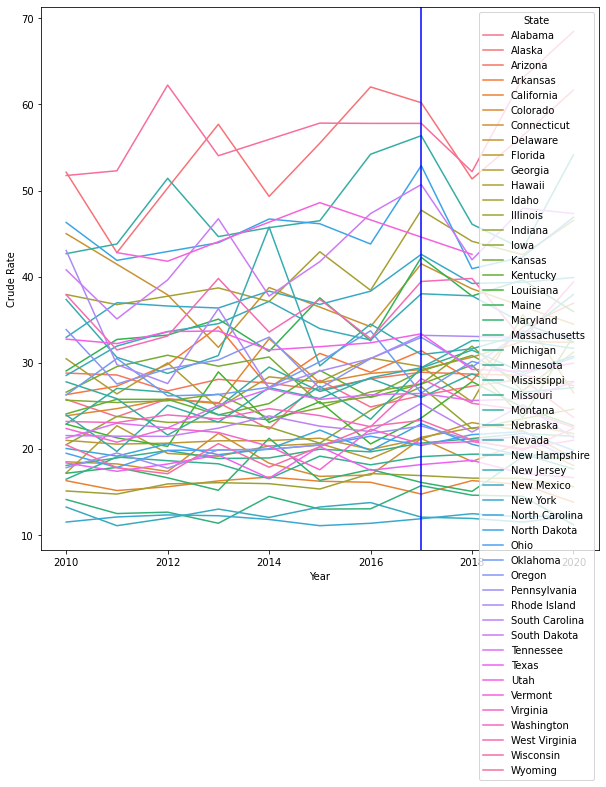

In [6]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Year', y = 'Crude Rate',data = df, hue = 'State',ci=None)
plt.axvline(2017, color='b', label='axvline - full height')